<a href="https://colab.research.google.com/github/Anusharoychowdhury/Anusha/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [9]:
gold_data = pd.read_csv('/content/drive/MyDrive/gld_price_data.csv')

In [10]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
gold_data.shape

(2290, 6)

In [13]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [15]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [17]:
correlation = gold_data.drop(columns=['Date']).corr()

<Axes: >

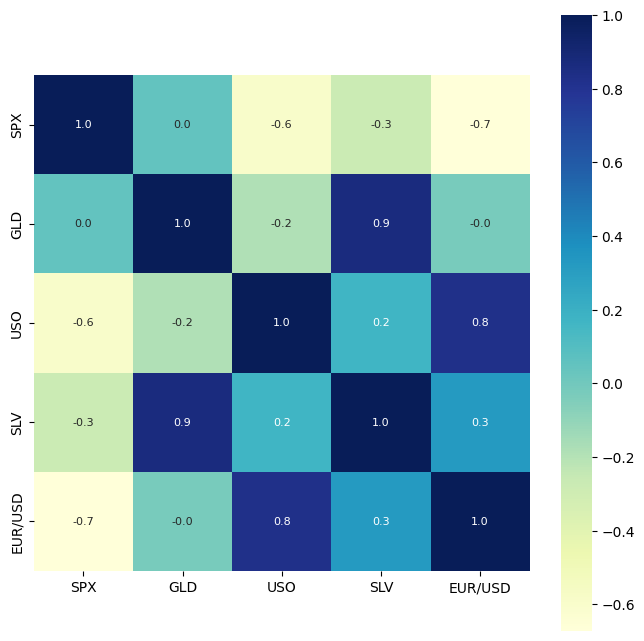

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='YlGnBu')

In [34]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


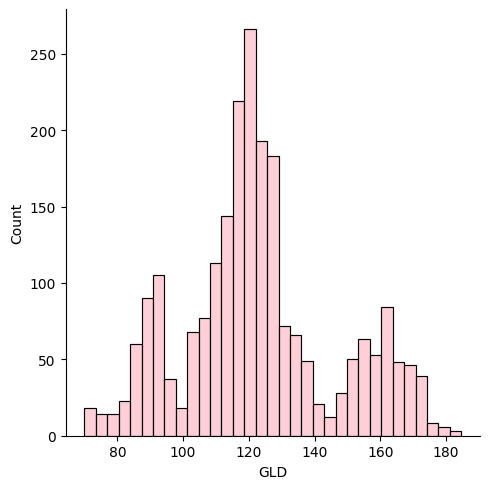

In [35]:
sns.displot(gold_data['GLD'], color='pink')

In [36]:
x = gold_data.drop(['Date','GLD'], axis= 1)
y= gold_data['GLD']

In [37]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [38]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [40]:
regressor = RandomForestRegressor(n_estimators=100)

In [41]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [42]:
test_data_prediction = regressor.predict(x_test)

In [43]:
print(test_data_prediction)

[168.69839981  81.93859994 115.96240013 127.47050083 120.91160105
 154.75109802 150.26239893 126.05269984 117.44679881 125.7963015
 116.65410086 171.97710099 141.58179857 168.01419856 115.18889982
 117.91120051 139.83150297 170.0875011  159.8430026  158.5328998
 155.14950018 124.98009986 176.53099986 157.51130298 125.18930047
  93.94699962  76.96890001 120.67379974 119.0549992  167.53690032
  88.18140057 125.26750022  91.20590059 117.86949999 121.07379948
 136.32360117 115.60340123 115.16230062 149.27999939 106.9190009
 104.06980229  87.25759802 126.48430062 117.94319961 155.09239904
 119.73869981 108.31610007 108.13379799  93.13170053 127.07339804
  74.90860028 113.56649919 121.4370001  111.30029919 118.86099892
 120.73809914 160.1832003  167.31250106 147.20139694  85.94469879
  94.57850037  86.8239985   90.54120032 118.9340008  126.4891009
 127.77350019 169.31280026 122.32789955 117.34299897  98.51289984
 168.25270095 142.95269844 132.11910255 121.16580243 120.97499922
 119.7357005  

In [45]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891918476814738


In [46]:
y_test= list(y_test)

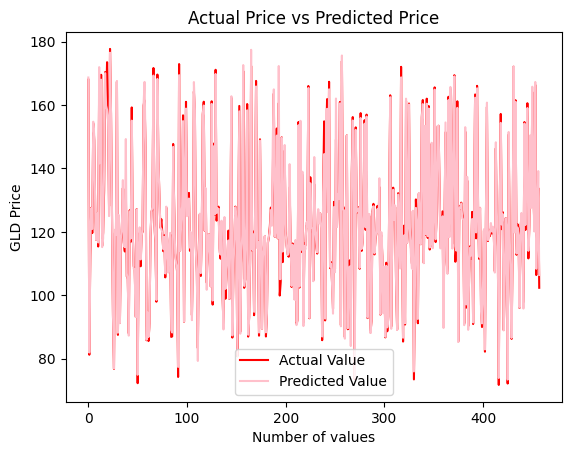

In [50]:
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='pink', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()